In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\r.bennetayeb\AppData\Local\Temp\ipykernel_25332\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [1]:
%matplotlib notebook
%matplotlib inline
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import streamlit as st

Matplotlib is building the font cache; this may take a moment.


### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [2]:
df = pd.read_csv("H:/SAE 601/archive/ds_salaries.csv")

In [3]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [5]:
# Répertoire cible dans votre projet
project_dir = r"....."

# Créer le répertoire (si nécessaire)
os.makedirs(project_dir, exist_ok=True)

# Copier le fichier depuis le cache au répertoire du projet
cache_file = r"..........ds_salaries.csv"
shutil.copy(cache_file, project_dir)

'C:\\Users\\r.bennetayeb\\Desktop\\these\\Enseignement\\SAE_projet\\Data\\ds_salaries.csv'

In [2]:
# Lire le fichier depuis le répertoire du projet


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [5]:
#données manquantes 
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


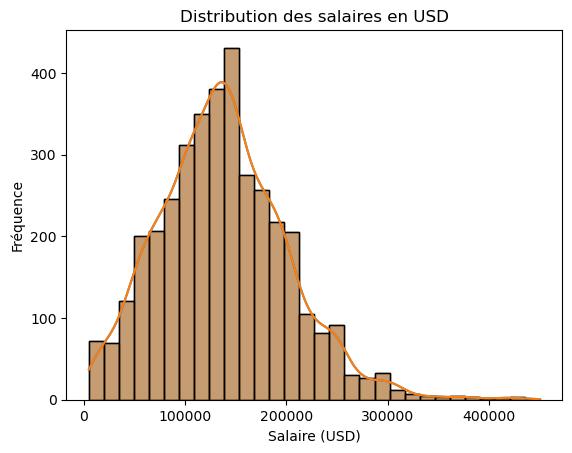

In [13]:
# Distribution des salaires en USD

sns.histplot(df['salary_in_usd'], kde=True, bins=30)
plt.title("Distribution des salaires en USD")
plt.xlabel('Salaire (USD)')
plt.ylabel('Fréquence')
plt.show()

In [31]:
# liste des pays concerné par l'étude 
print(pd.unique(df['employee_residence']))

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL' 'CH' 'CF' 'FR' 'AU'
 'FI' 'UA' 'IE' 'IL' 'GH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'BR' 'TH'
 'HR' 'PL' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK'
 'IT' 'MA' 'LT' 'BE' 'AS' 'IR' 'HU' 'SK' 'CN' 'CZ' 'CR' 'TR' 'CL' 'PR'
 'DK' 'BO' 'PH' 'DO' 'EG' 'ID' 'AE' 'MY' 'JP' 'EE' 'HN' 'TN' 'RU' 'DZ'
 'IQ' 'BG' 'JE' 'RS' 'NZ' 'MD' 'LU' 'MT']


In [28]:
#Salaire moyen par rôle
print(df.groupby('job_title')['salary_in_usd'].mean())


# Salaire moyen par pays
print(df.groupby('company_location')['salary_in_usd'].mean())

# Salaires moyens par niveau d'expérience
print(df.groupby('experience_level')['salary_in_usd'].mean())

job_title
3D Computer Vision Researcher     21352.250000
AI Developer                     136666.090909
AI Programmer                     55000.000000
AI Scientist                     110120.875000
Analytics Engineer               152368.631068
                                     ...      
Research Engineer                163108.378378
Research Scientist               161214.195122
Software Data Engineer            62510.000000
Staff Data Analyst                15000.000000
Staff Data Scientist             105000.000000
Name: salary_in_usd, Length: 93, dtype: float64
company_location
AE    100000.000000
AL     10000.000000
AM     50000.000000
AR     25000.000000
AS     29351.000000
          ...      
TH     23064.333333
TR     19058.000000
UA     57850.000000
US    151822.009539
VN     12000.000000
Name: salary_in_usd, Length: 72, dtype: float64
experience_level
EN     78546.284375
EX    194930.929825
MI    104525.939130
SE    153051.071542
Name: salary_in_usd, dtype: float64


#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [34]:
# Filtrer les salaires pour un pays donné (ex : US)
filtered_df = df[df['company_location'] == 'US']

filtered_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [62]:
# Top 5 des entreprises qui paient le plus

df_temp_Pays = df.groupby('company_location')['salary_in_usd'].mean()

df_temp_Pays.sort_values(ascending = False).head(5)

company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
Name: salary_in_usd, dtype: float64

In [65]:
# Filtrer les données
# Rôles avec un salaire moyen supérieur à 100,000
df_temp_job = df.groupby('job_title')['salary_in_usd'].mean()
filtered_df2 = df_temp_job[df_temp_job > 100000]

print(filtered_df2)
# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
df_temp_prop = df[df['remote_ratio'] == 100].groupby('employee_residence')['remote_ratio'].count()

df_temp_prop = df_temp_prop.sort_values(ascending=False)

print(df_temp_prop)

job_title
AI Developer                                136666.090909
AI Scientist                                110120.875000
Analytics Engineer                          152368.631068
Applied Data Scientist                      113726.300000
Applied Machine Learning Scientist          109452.833333
Applied Scientist                           190264.482759
BI Analyst                                  104888.888889
BI Developer                                129846.153846
Big Data Architect                          125802.500000
Business Intelligence Engineer              174150.000000
Cloud Data Architect                        250000.000000
Cloud Database Engineer                     155000.000000
Computer Vision Engineer                    143536.111111
Data Analyst                                108716.227124
Data Analytics Lead                         211254.500000
Data Analytics Manager                      141879.090909
Data Architect                              161713.772277
Data

In [80]:
# Requêtes conditionnelles
# "Salaire moyen des employés à distance (100%)
print("Salaire moyen des employés à distance :",df[df['remote_ratio'] == 100]['salary_in_usd'].mean())
# Comparer salaires moyens pour deux catégories
print("Salaire moyen des Machine Learning Manager :",df[df['job_title'] == 'Machine Learning Manager']['salary_in_usd'].mean())
print("Salaire moyen des Data Analytics Manager :",df[df['job_title'] == 'Data Analytics Manager']['salary_in_usd'].mean())
#Les  Machine Learning Manager gagnent plus que les Data Analytics Manager

Salaire moyen des employés à distance : 136481.45283018867
Salaire moyen des Machine Learning Manager : 155701.33333333334
Salaire moyen des Data Analytics Manager : 141879.0909090909


In [89]:
# Ajouter une colonne pour les fourchettes de salaires
fourchette = [0, 50000, 100000, 150000, float('inf')]
categ = ["<50", "50K-100K", "100K-150K", ">150K"]


df['salary_range'] = pd.cut(df['salary_in_usd'], bins=fourchette, labels=categ, right=False)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_range
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,50K-100K
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,<50
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,<50
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,>150K
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,100K-150K
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,>150K
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,>150K
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,100K-150K
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,100K-150K


In [97]:
# Analyse des corrélations
# Relation entre télétravail et salaire
df['salary_in_usd'].corr(df['remote_ratio'])

-0.06417098519057557

In [95]:
# Salaire moyen par taille d'entreprise
print(df.groupby('company_size')['salary_in_usd'].mean())

company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64


In [100]:
# Tableaux croisés
# Moyenne des salaires par niveau d'expérience et télétravail
pivot_table = df.pivot_table(
    index='experience_level', 
    columns='remote_ratio', 
    values='salary_in_usd', 
    aggfunc='min'
)
print("Tableau croisé des salaires :", pivot_table)

Tableau croisé des salaires : remote_ratio        0      50     100
experience_level                     
EN                 5882   5409   6270
EX                15000  76309  69741
MI                 9466   5409   5132
SE                18907  10000   8000
